<a href="https://colab.research.google.com/github/SimranaSinha/PRODIGY_DS_02/blob/main/DS_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing **Libraries**

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the dataset**

Mounting Google Drive into the Colab environment will enable easy file handling and facilitate operations such as reading, writing, and manipulation.

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Load the data from the CSV file
file_path = r"/content/drive/MyDrive/train.csv"

In [9]:
data = pd.read_csv(file_path)

In [10]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [12]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [14]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [15]:
data.drop(columns=['Cabin'], inplace=True)

In [16]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [17]:
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB
None


# **Exploratory Data Analysis (EDA)**

Calculating the percentage of passengers who survived and printing it with two decimal places.

In [19]:
survival_rate = data['Survived'].mean()
print(f'Survival Rate: {survival_rate * 100:.2f}%')

Survival Rate: 38.38%


This program calculates the survival rate for each gender—for example, males and females—and prints these rates. This will, in turn then, give the proportion of survivors within each gender group in the output.

In [21]:
survival_rate_gender = data.groupby('Sex')['Survived'].mean()
print(survival_rate_gender)

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


Calculating survival rates for each passenger class and printing these rates.The output shows the proportion of survivors within each class, allowing for comparison between different passenger classes.

In [22]:
survival_rate_class = data.groupby('Pclass')['Survived'].mean()
print(survival_rate_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Categorizing passengers into age groups and then calculates and printing the survival rate for each group.The output is for the proportion of survivors within each age category, thus showing how survival rates varied by age on the Titanic.

In [23]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, np.inf], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
survival_rate_age_group = data.groupby('AgeGroup', observed=True)['Survived'].mean()  # Set observed=True to avoid the warning
print(survival_rate_age_group)

AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


# **Visualization**

<ipython-input-25-1e66c9f2d8ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, palette=['blue', 'pink'])


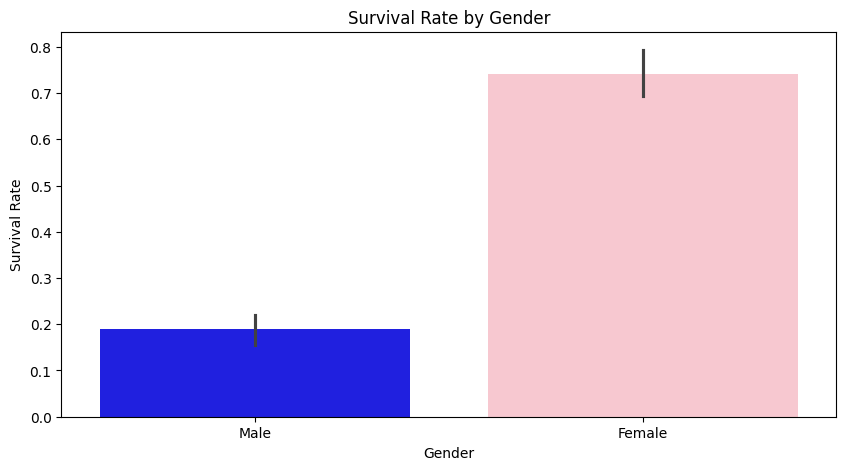

In [25]:
# Survival rate by gender
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Survived', data=data, palette=['blue', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

<ipython-input-28-76feb6a0f61e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette=['red', 'cyan', 'green'])


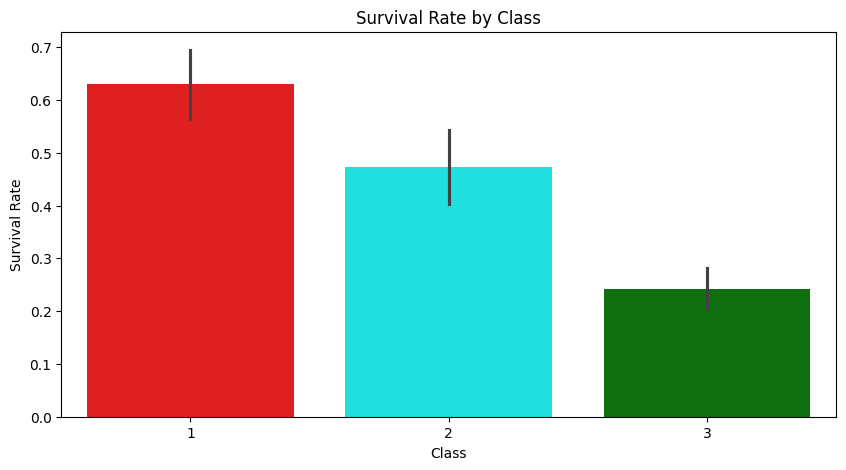

In [28]:
# Survival rate by class
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data=data, palette=['red', 'cyan', 'green'])
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-31-1abd9e66c0f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=data, palette=['#ff69b4', '#33cc33', '#6666ff', '#ffff66'])
<ipython-input-31-1abd9e66c0f4>:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='AgeGroup', y='Survived', data=data, palette=['#ff69b4', '#33cc33', '#6666ff', '#ffff66'])


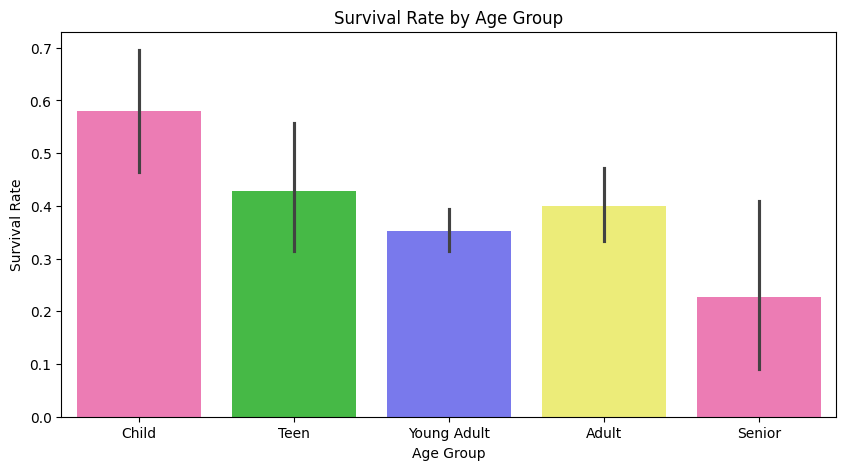

In [31]:
# Survival rate by age group
plt.figure(figsize=(10, 5))
sns.barplot(x='AgeGroup', y='Survived', data=data, palette=['#ff69b4', '#33cc33', '#6666ff', '#ffff66'])
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

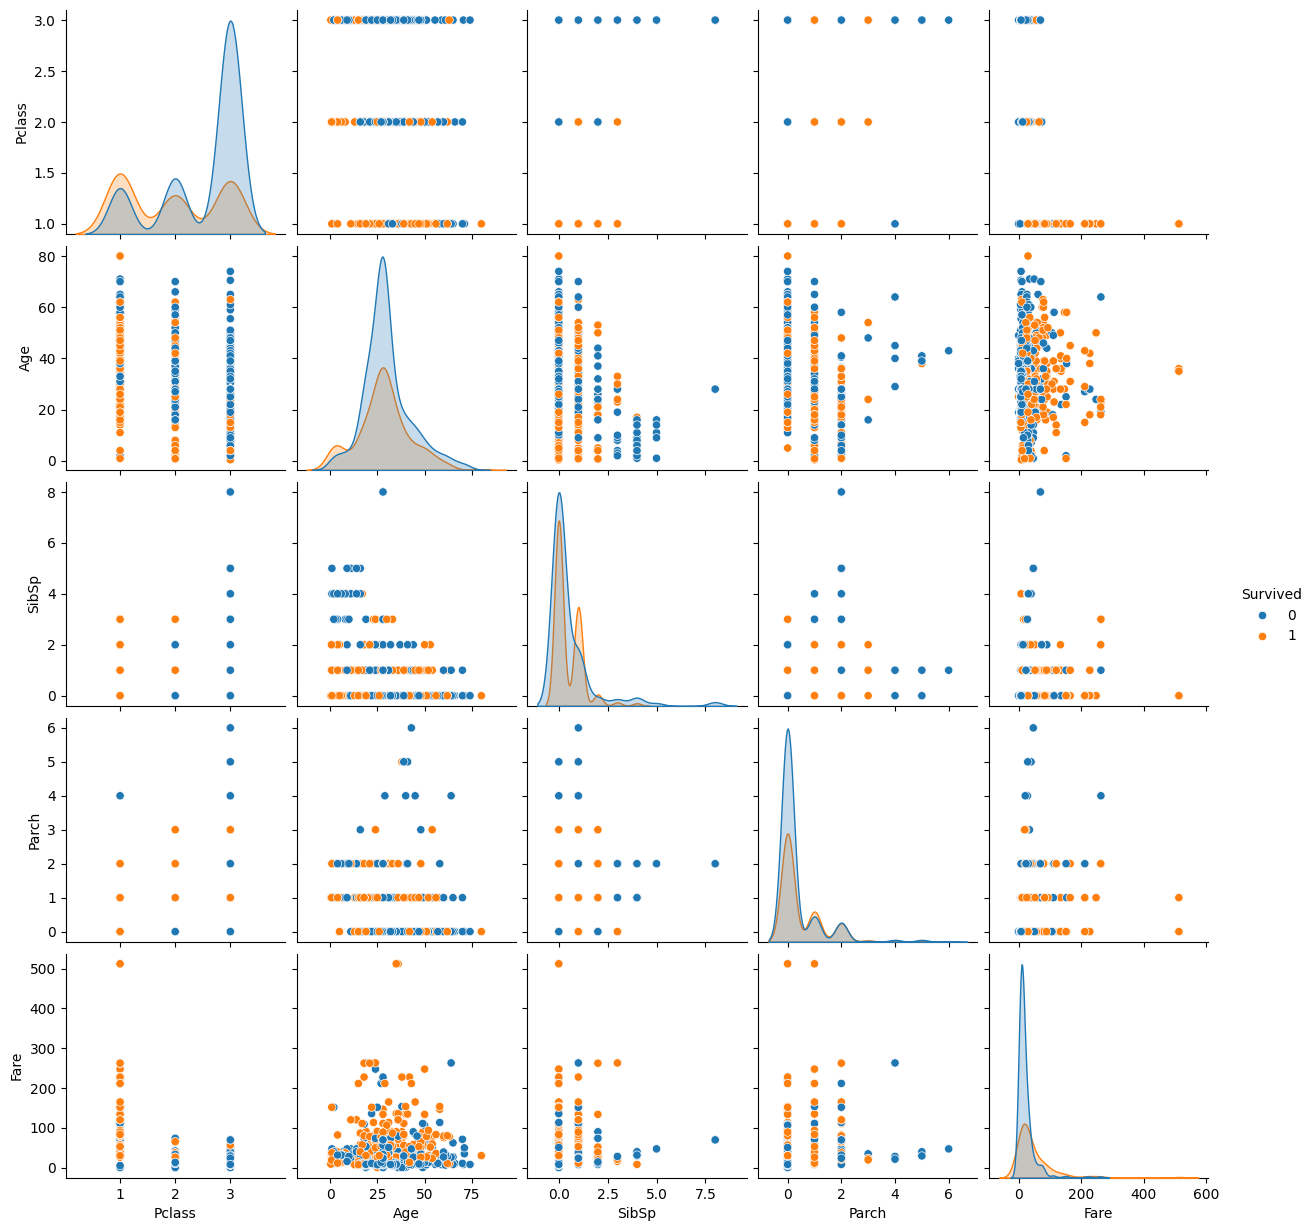

In [33]:
sns.pairplot(data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', diag_kind='kde')
plt.show()